# 1. World records as measures of senescence

## 1.1 Introduction

This exercise consists of running simulations with three probabilities functions (normal, exponential and lognormal) to show that sample size is a major issue with the study of senescence and drops in performance: https://callingbullshit.org/case_studies/case_study_track_records.html


## 1.2 Visualize the decrease in world records by age

The first step is to recreate the original line chart of Bergstrom & Dugatkin (2016) that shows world records decreasing by age. Since some records correspond to the lowest value (e.g., the 100m dash) while others correspond to the highest value (i.e., the longjump), we first define two functions to scale both types of records so we could compare different records if we wanted to.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import random

# Function that scales the data in case of records where lower is better
def scale_records(data):
    record = min(data)
    data_scaled = [record / x for x in data]
    return data_scaled

# Function that scales the data in case of records where higher is better
def scale_data(data):
    best = max(data)
    data_scaled = [x / best for x in data]
    return data_scaled

# Set random seed
random.seed(1)

We include the records on the 100m dash for different age groups below:

In [4]:
# 100m dash world records (2016)
records_100 = [9.58, 9.96, 10.29, 10.72, 10.88, 11.39, 11.70, 12.37, 12.77, 13.49, 14.35, 15.97, 17.53, 20.41, 29.83]
age = [20, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

Now create a plot of the scaled records vs. age.

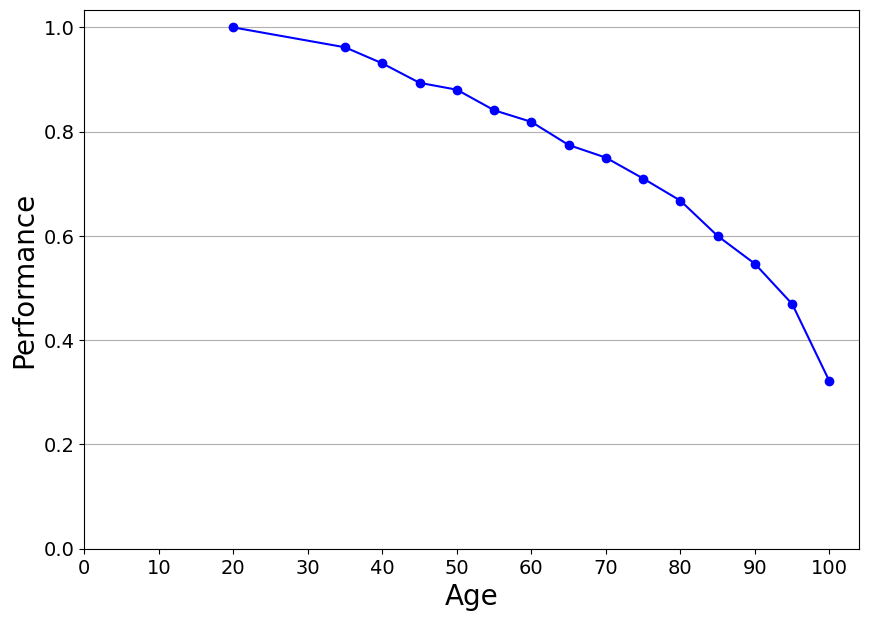

In [5]:
# Scale the records in scores of perfomance in relation to the world record.
records_100_scaled = scale_records(records_100)
    
# Plot the evolution of performance according the age.
plt.figure(figsize=(10,7))
plt.plot(age, records_100_scaled, 'bo-')
plt.xlabel('Age', fontsize=20)
plt.ylabel('Performance', fontsize=20)
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(np.arange(0, 1.2, 0.2), fontsize=14)
plt.grid(axis = 'y')
plt.show()

## 1.2 Simulate the effects of different sample sizes

Now we recreate the second plot from the lecture where we compare the impact of different sample sizes on the records. For this, you need to generate samples of 100m dash times drawn from three different distributions: (1) normal, (2) exponential, and (3) log-normal. You could try out the following sample sizes: 10, 100, 1,000, 10,000, 100,000, and 1,000,000. We recommend you do this using [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling).

In [7]:
# Sample sizes
populations = [1000000, 100000, 10000, 1000, 100, 10]

# Calculate the mean and standard deviation from all our data. In the case of our null model, 
# there is no senescence and performance is record performance is stable over the years, so we
# take the average of our current set of scores, regardless of age.
mu = np.mean(records_100)
sigma = np.std(records_100)


# Function for performing inverse transform sampling
def inverse_transform_sampling(distribution, populations, mu, sigma):
    samples = []
    for population_size in populations:
        best = []
        # Run it 10 times.
        for i in range(0, 10):
            U = np.random.uniform(size = population_size)
            # 1: Normal distribution
            if distribution == 1:
                best.append(max(stats.norm.ppf(U)))
            # 2: Exponential distribution
            elif distribution == 2:
                best.append(max(stats.expon.ppf(U)))
            # 3: Log-normal distribution
            else:
                best.append(max(stats.lognorm.ppf(q = U, s = 1)))
        samples.append(np.mean(best))
    return samples


# Now do the inverse transform sampling for all three distribution types.
records_normal = inverse_transform_sampling(1, populations, mu, sigma)
records_exponential = inverse_transform_sampling(2, populations, mu, sigma)
records_lognormal = inverse_transform_sampling(3, populations, mu, sigma)

Once you've performed the inverse transform sampling for all three distribution types, remember to scale the values and plot them against.

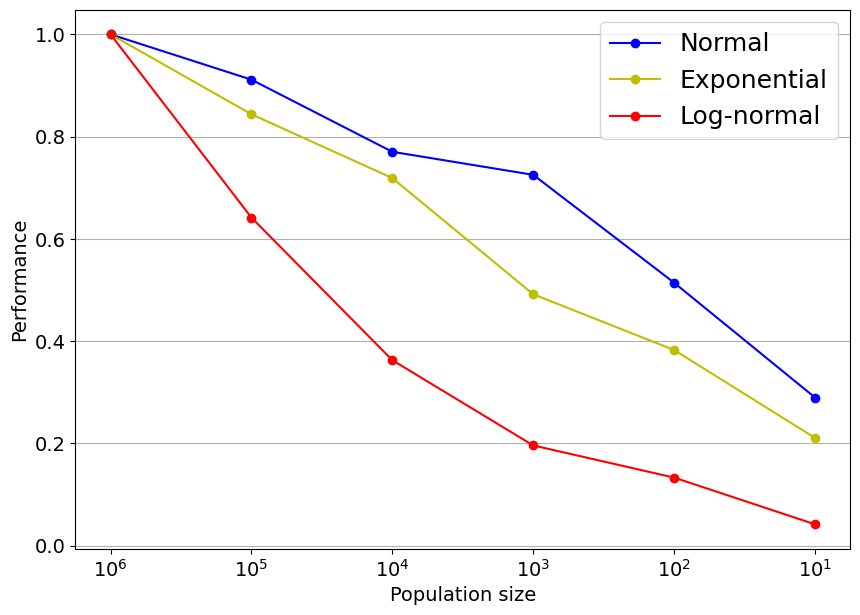

In [8]:
# Scale the data.
y_normal = scale_data(records_normal)
y_exponential = scale_data(records_exponential)
y_lognormal = scale_data(records_lognormal)


# Generate the plot.
x = [1, 2, 3, 4, 5, 6]
plt.figure(figsize=(10,7))
plt.plot(x, y_normal, 'bo-', label = 'Normal')
plt.plot(x, y_exponential, 'yo-', label = 'Exponential')
plt.plot(x, y_lognormal, 'ro-', label = 'Log-normal')
plt.legend(fontsize=18)
plt.xlabel('Population size', fontsize = 14)
plt.ylabel('Performance', fontsize = 14)
plt.xticks([1, 2, 3, 4, 5, 6],  ["$10^6$", "$10^5$", "$10^4$", "$10^3$", "$10^2$", "$10^1$"], fontsize = 14)
plt.yticks(np.arange(0, 1.2, 0.2), fontsize = 14)
plt.grid(axis = 'y')

As we also showed in class, descreasing sample sizes for different distributions—and especially the normal distribution—can also explain the pattern, so the original plot is not convincing evidence of senescence in terms of world records.

If you want, you can now repeat this with another types of record (e.g., the longjump). You will need to find these records for the different age groups yourself.